### Gradient Descent - algorytm stochastycznego spadku
Stochastyczny spadek gradientu

OPTYMALIZATOR:
- odpowiedzialny za uczenie naszej sieci neuronowej
- na podstawie funkcji straty, optymalizator podejmuje decyzję w jaki sposób będzie się uczył w kolejnej iteracji
- najprostszy: optymalizator stochastycznego spadku
- jest dużo odmian tego algorytmu, my zaimplementujemy ten w najprostszej postaci, algorytm stochastycznego spadku

Badamy funkcję straty zapisaną wzorem:
$L(w) = w^2 - 4w$

Pochodna tej funkcji w punkcie to:
$\frac {dL} {dw} = 2w - 4$ - to współczynnik kierunkowy stycznej do danego punktu. Jeśli jest równe 0 w jakimś punkcie, to mamy do czynienia z minimum lub maksimum. Jest to wtedy prosta stała, dla każdego x ma stałą wartość. 

Wskaźnik ujemny - prosta nachylona w prawo, wskaźnik dodatni - wartości rosną w prawo.

Funkcja straty z wieloma parametrami jest trudna do wizualizacji. Nas interesuje minimum globalne (na całej dziedzinie najmniejsza wartość). 

Pochodna przy wielu zmiennych = gradient

Problem: znajdź lokalne minimum zaczynając z dowolnego punktu na wykresie. 

Krok 1. Inicjalizacja dowolnej wartości dla w. Weźmy $w=-1$

Krok 2. Obliczenie pochodnej (gradientu) funkcji

Krok 3. Dobranie wskaźnika uczenia (learning rate), np. $0.1$, zmiany po każdej iteracji będą bardziej znaczące, najczęściej jest to mniejsza liczba (np. 0.01)

Krok 4. Ruch w kierunku ujemnego gradientu

Gradient funkcji w danym miejscu pokazuje kierunek, w którym funkcja rośnie najszybciej. Nas interesuje sytuacja przeciwna (spadek). Dlatego poruszymy się w kierunku przeciwnym do wyznaczonego przez gradient.

Propagacja w przód - otrzymujemy przewidywania na ostatniej warstwie (wyjściowej, output layer). Otrzymujemy wartość wyjściową, którą możemy porównać z wartością rzeczywistą, obliczyć za pomocą funkcji straty nasz błąd estymacji, następnie obliczamy pochodną wartości błędu w odniesieniu do każdej wagi (na warstwie wejściowej mamy np. 2 wagi, na ukrytej np. 4 wagi - bo 4 węzły) i próbujemy zoptymalizować funkcję straty. Czyli obliczylibyśmy pochodną wartości błędu w odniesieniu do każdej wagi w sieci neuronowej i następnie odjęli wartość gradientu od naszej funkcji straty, żeby zmniejszyć wartość błędu. 

W ten sposób sieć się uczy, trenuje i zbliża się do naszych lokalnych minimów.

Im bardziej architektura sieci jest rozbudowana, tym dłuższe będzie uczenie sieci. Sieci konwolucyjne nieco zmniejszają ten problem złożoności obliczeniowej.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

Text(0.5, 1.0, 'Loss function')

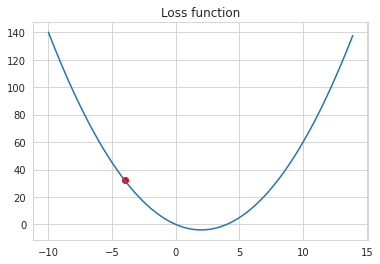

In [ ]:
# OPTYMALIZATOR STOCHASTYCZNEGO SPADKU GRADIENTU


# obrazujemy funkcję straty

w = np.arange(-10, 14, 0.1)
Loss = w**2 - 4*w

point = -4 # będziemy go przesuwać do minimum globalnego

# plt.figure(figsize=(8, 6))
plt.plot(point, point ** 2 - 4 * point, 'ro')

plt.plot(w, Loss)
plt.title('Loss function')

In [ ]:
# implementujemy algorytm stochastycznego spadku gradientu

def gradient_descent(df=lambda w: 2*w-4, # gradient funkcji do optymalizacji
                     learning_rate=0.01, # wskaźnik uczenia
                     w_0=-4, # inicjalizacja wagi początkowej
                     max_iters=10000, # max liczba iteracji
                     precision=0.00001): # precyzja - spr. kiedy zatrzymać algorytm
    """
    parametry:
    ----------
    df: gradient funkcji do optymalizacji
    learning_rate: wskaźnik uczenia
    max_iters: maksymalna liczba iteracji
    precision: precyzja sprawdza kiedy zatrzymać działanie algorytmu
    w_0: inicjalizacja wagi początkowej
    """
    
    # licznik iteracji:
    iters = 0

    # kontrola wartości kroku kolejnego spadku, 
    # jeśli wartość kroku kolejnego spadku będzie mniejsza 
    # od precyzji, kończymy działanie algorytmu
    previous_step_size = 1

    # wagi, które były aktualizowane
    weights = []

    while previous_step_size > precision and iters < max_iters:
        w_previous = w_0
        w_0 = w_0 - learning_rate * df(w_previous)
        previous_step_size = abs(w_0 - w_previous)
        iters += 1
        weights.append(w_0)
        print('Iteracja nr:',iters, '| Wartość wagi obecnego punktu:',w_0)
    
    print('Minimum lokalne znajduje się w punkcie:',w_0)
    return weights


Iteracja nr: 1 | Wartość wagi obecnego punktu: -7.6
Iteracja nr: 2 | Wartość wagi obecnego punktu: -5.68
Iteracja nr: 3 | Wartość wagi obecnego punktu: -4.144
Iteracja nr: 4 | Wartość wagi obecnego punktu: -2.9152
Iteracja nr: 5 | Wartość wagi obecnego punktu: -1.9321599999999999
Iteracja nr: 6 | Wartość wagi obecnego punktu: -1.1457279999999999
Iteracja nr: 7 | Wartość wagi obecnego punktu: -0.5165823999999998
Iteracja nr: 8 | Wartość wagi obecnego punktu: -0.01326591999999982
Iteracja nr: 9 | Wartość wagi obecnego punktu: 0.3893872640000002
Iteracja nr: 10 | Wartość wagi obecnego punktu: 0.7115098112000002
Iteracja nr: 11 | Wartość wagi obecnego punktu: 0.9692078489600002
Iteracja nr: 12 | Wartość wagi obecnego punktu: 1.1753662791680002
Iteracja nr: 13 | Wartość wagi obecnego punktu: 1.3402930233344001
Iteracja nr: 14 | Wartość wagi obecnego punktu: 1.47223441866752
Iteracja nr: 15 | Wartość wagi obecnego punktu: 1.577787534934016
Iteracja nr: 16 | Wartość wagi obecnego punktu: 1.66

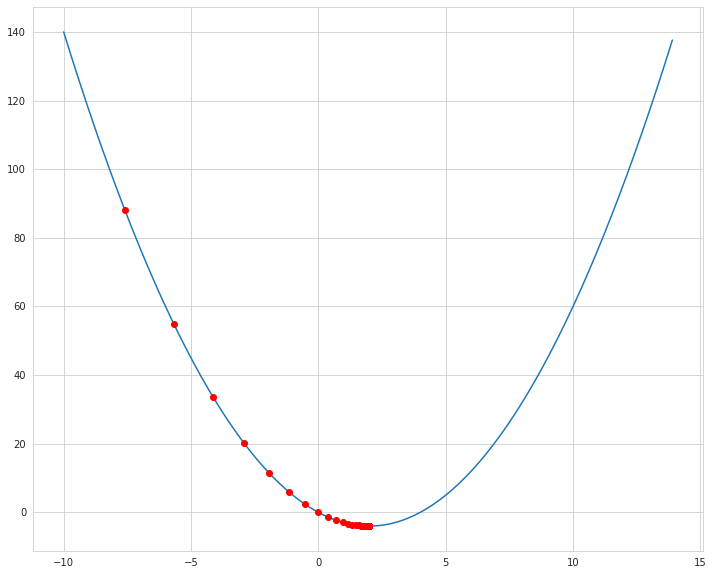

In [ ]:
w = np.arange(-10, 14, 0.1)
Loss = w**2 - 4*w

plt.figure(figsize=(12,10))
plt.plot(w, Loss)

weights = gradient_descent(w_0=-10,learning_rate=0.1)

for weight in weights:
    plt.plot(weight,weight**2-4*weight,'ro')